## Q1. Theory and Concepts:

In [1]:
## 1) Explain the concept of batch normalization in the context of Artificial Neural Networks.
'''Batch normalization is a technique used to make training of artificial neural networks faster and more stable through normalization of the layers’ inputs by re-centering and re-scaling.
In a neural network, batch normalization is achieved through a normalization step that fixes the means and variances of each layer’s inputs.
Ideally, the normalization would be conducted over the entire training set, but to use this step jointly with stochastic optimization methods, it is impractical to use the global information.
Batch normalization is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.'''

'Batch normalization is a technique used to make training of artificial neural networks faster and more stable through normalization of the layers’ inputs by re-centering and re-scaling.\nIn a neural network, batch normalization is achieved through a normalization step that fixes the means and variances of each layer’s inputs. \nIdeally, the normalization would be conducted over the entire training set, but to use this step jointly with stochastic optimization methods, it is impractical to use the global information.\nBatch normalization is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.'

In [2]:
## 2) Describe the benefits of using batch normalization during training.
'''Batch normalization has several benefits. First, it can help to stabilize the training of deep neural networks.
Deep neural networks are often very sensitive to the initialization of the weights and can be difficult to train.
Batch normalization can help to reduce this sensitivity and make the training process more stable.
Second, it can help to improve the accuracy of the network by reducing the internal covariate shift.
Finally, it can help to speed up the training of the network2. By normalizing the hidden layer activation, batch normalization speeds up the training process.'''

'Batch normalization has several benefits. First, it can help to stabilize the training of deep neural networks.\nDeep neural networks are often very sensitive to the initialization of the weights and can be difficult to train. \nBatch normalization can help to reduce this sensitivity and make the training process more stable. \nSecond, it can help to improve the accuracy of the network by reducing the internal covariate shift. \nFinally, it can help to speed up the training of the network2. By normalizing the hidden layer activation, batch normalization speeds up the training process.'

In [3]:
## 3) Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.
'''Batch normalization is a technique that normalizes the inputs to a layer in a neural network to make training faster and more stable.
It can be used with most network types, such as Multilayer Perceptrons, Convolutional Neural Networks and Recurrent Neural Networks.
The algorithm calculates the mean and standard deviation of each input variable per mini-batch and uses them to perform the standardization.
Batch normalization can be applied before or after the activation function, but research shows it is better when applied before the activation function.
The normalization step is performed by subtracting the mean of the mini-batch from each input variable and then dividing by the standard deviation of the mini-batch.
This has the effect of re-centering and re-scaling the inputs to each layer.
Batch normalization also has learnable parameters that allow it to adapt to the data.
These parameters are learned during training and are used to scale and shift the normalized inputs so that they can be used by subsequent layers.'''

'Batch normalization is a technique that normalizes the inputs to a layer in a neural network to make training faster and more stable. \nIt can be used with most network types, such as Multilayer Perceptrons, Convolutional Neural Networks and Recurrent Neural Networks.\nThe algorithm calculates the mean and standard deviation of each input variable per mini-batch and uses them to perform the standardization. \nBatch normalization can be applied before or after the activation function, but research shows it is better when applied before the activation function.\nThe normalization step is performed by subtracting the mean of the mini-batch from each input variable and then dividing by the standard deviation of the mini-batch. \nThis has the effect of re-centering and re-scaling the inputs to each layer.\nBatch normalization also has learnable parameters that allow it to adapt to the data. \nThese parameters are learned during training and are used to scale and shift the normalized inputs

# Q2. Implementation:

In [4]:
## 1) Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it.
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0
# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
# Convert labels to categorical form
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
## 2) Implement a simple feedforward neural network using any deep learning framework/library (e.g.,TensorFlow, PyTorch).
## 3) Train the neural network on the chosen dataset without using batch normalization.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
# Build the neural network model without batch normalization
model_no_bn = Sequential()
model_no_bn.add(Dense(128, activation='relu', input_shape=(784,)))
model_no_bn.add(Dense(64, activation='relu'))
model_no_bn.add(Dense(10, activation='softmax'))

# Compile the model without batch normalization
model_no_bn.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model without batch normalization
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2528 - accuracy: 0.9258 - val_loss: 0.1284 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1061 - accuracy: 0.9675 - val_loss: 0.1032 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0741 - accuracy: 0.9762 - val_loss: 0.1040 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0986 - val_accuracy: 0.9698
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0964 - val_accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0311 - accuracy: 0.9896 - val_loss: 0.0844 - val_accuracy

In [6]:
## 4) Implement batch normalization layers in the neural network and train the model again.
# Build the neural network model with batch normalization
model_bn = Sequential()
model_bn.add(Dense(128, activation='relu', input_shape=(784,)))
model_bn.add(BatchNormalization())
model_bn.add(Dense(64, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(10, activation='softmax'))

# Compile the model with batch normalization
model_bn.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2445 - accuracy: 0.9273 - val_loss: 0.1203 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1208 - accuracy: 0.9631 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0922 - accuracy: 0.9716 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.0865 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0779 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0585 - accuracy: 0.9812 - val_loss: 0.0794 - val_accuracy: 0.9753
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0495 - accuracy: 0.9838 - val_loss: 0.0760 - val_accura

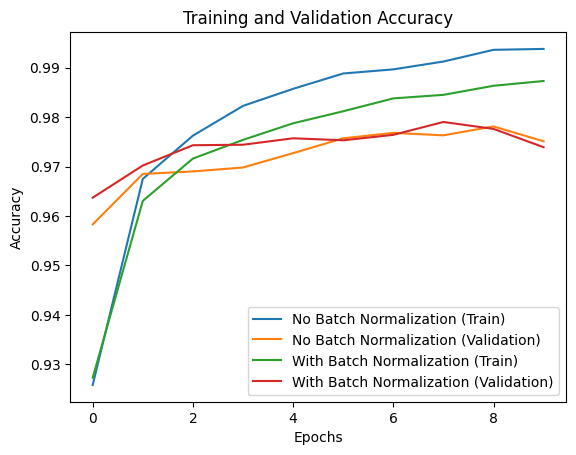

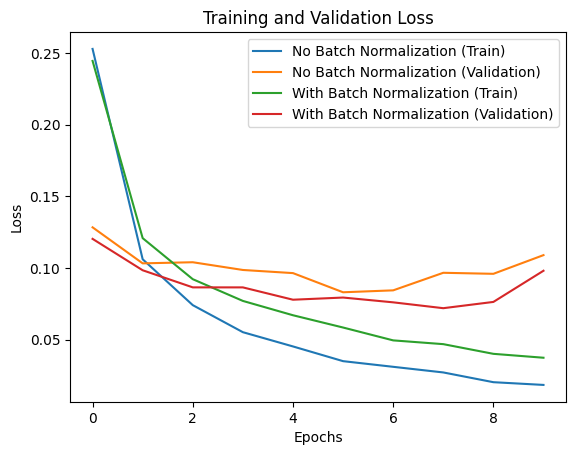

In [7]:
## 5) Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
# Plot the accuracy for comparison
import matplotlib.pyplot as plt
plt.plot(history_no_bn.history['accuracy'], label='No Batch Normalization (Train)')
plt.plot(history_no_bn.history['val_accuracy'], label='No Batch Normalization (Validation)')
plt.plot(history_bn.history['accuracy'], label='With Batch Normalization (Train)')
plt.plot(history_bn.history['val_accuracy'], label='With Batch Normalization (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the loss for comparison
plt.plot(history_no_bn.history['loss'], label='No Batch Normalization (Train)')
plt.plot(history_no_bn.history['val_loss'], label='No Batch Normalization (Validation)')
plt.plot(history_bn.history['loss'], label='With Batch Normalization (Train)')
plt.plot(history_bn.history['val_loss'], label='With Batch Normalization (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [8]:
## 6) Discuss the impact of batch normalization on the training process and the performance of the neural network.
'''
Batch normalization has several impacts on the training process and the performance of a neural network:

1) Accelerated training: Batch normalization helps in accelerating the training process. By normalizing the activations of each layer,
it reduces the internal covariate shift problem, which leads to faster convergence. The normalization enables higher learning rates, allowing the network to converge more quickly.

2) Improved gradient flow: Batch normalization reduces the dependence of gradients on the scale of the parameters, which helps in mitigating the vanishing or exploding gradient problem.
This leads to more stable and efficient gradient flow during backpropagation, facilitating the training of deeper networks.

3) Reduced sensitivity to weight initialization: Batch normalization makes the network less sensitive to the choice of initial weights.
The normalization operation helps in reducing the impact of weight initialization on the network's overall performance.
As a result, it becomes easier to find appropriate weight initializations, which can be beneficial when training complex networks.

4) Regularization effect: Batch normalization acts as a form of regularization by adding some noise to the activations within each mini-batch during training.
This noise acts as a regularizer, similar to dropout, which helps in reducing overfitting and improving the model's generalization ability.

5) Handling different input distributions: Batch normalization is particularly useful when dealing with inputs that have different distributions.
It normalizes the inputs within each mini-batch, making the network less dependent on the exact distribution of the training data.
This property can be beneficial when the training and testing data have different statistics or when the input distribution changes over time.

Overall, batch normalization has a positive impact on the training process and the performance of a neural network.
It helps in stabilizing and accelerating the training, improving gradient flow, reducing sensitivity to weight initialization, providing regularization, and handling different input distributions.
These benefits make batch normalization a valuable technique for training deep neural networks and improving their overall performance.'''

"\nBatch normalization has several impacts on the training process and the performance of a neural network:\n\n1) Accelerated training: Batch normalization helps in accelerating the training process. By normalizing the activations of each layer, \nit reduces the internal covariate shift problem, which leads to faster convergence. The normalization enables higher learning rates, allowing the network to converge more quickly.\n\n2) Improved gradient flow: Batch normalization reduces the dependence of gradients on the scale of the parameters, which helps in mitigating the vanishing or exploding gradient problem. \nThis leads to more stable and efficient gradient flow during backpropagation, facilitating the training of deeper networks.\n\n3) Reduced sensitivity to weight initialization: Batch normalization makes the network less sensitive to the choice of initial weights. \nThe normalization operation helps in reducing the impact of weight initialization on the network's overall performan

# Q3. Experimentation and AnaLysis:

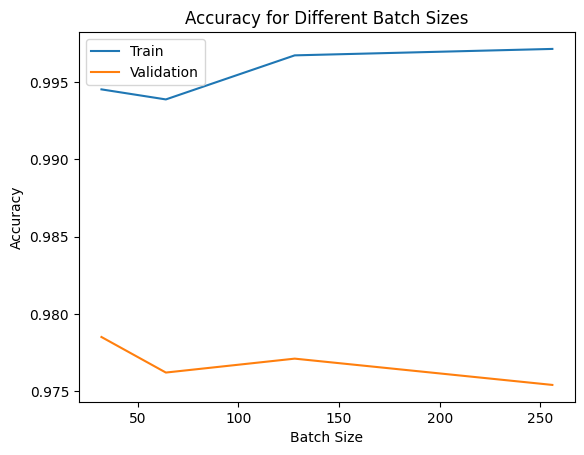

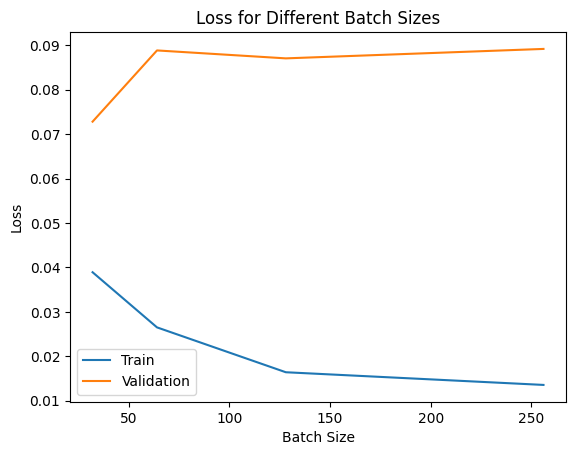

In [9]:
## 1) Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical form
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define different batch sizes to experiment with
batch_sizes = [32, 64, 128, 256]

# Lists to store accuracy and loss for different batch sizes
train_acc = []
val_acc = []
train_loss = []
val_loss = []

for batch_size in batch_sizes:
    # Build the neural network model with batch normalization
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    # Compile the model with batch normalization
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model with different batch sizes
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, verbose=0, validation_data=(x_test, y_test))

    # Evaluate the model
    _, train_acc_value = model.evaluate(x_train, y_train, verbose=0)
    _, val_acc_value = model.evaluate(x_test, y_test, verbose=0)

    # Store accuracy and loss for the current batch size
    train_acc.append(train_acc_value)
    val_acc.append(val_acc_value)
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

# Plot the accuracy for different batch sizes
plt.plot(batch_sizes, train_acc, label='Train')
plt.plot(batch_sizes, val_acc, label='Validation')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for Different Batch Sizes')
plt.show()

# Plot the loss for different batch sizes
plt.plot(batch_sizes, train_loss, label='Train')
plt.plot(batch_sizes, val_loss, label='Validation')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss for Different Batch Sizes')
plt.show()

In [10]:
## 2) Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.
'''Advantages of Batch Normalization:
1) Accelerated Training: Batch normalization helps in accelerating the training process by reducing the internal covariate shift problem.
It allows for faster convergence, enabling the use of higher learning rates and reducing the number of required training iterations.

2) Improved Gradient Flow: Batch normalization reduces the dependence of gradients on the scale of the parameters, mitigating the vanishing or exploding gradient problem.
This leads to more stable and efficient gradient flow during backpropagation, which facilitates training of deeper networks.

3) Robustness to Initialization: Batch normalization makes neural networks less sensitive to the choice of initial weights.
It reduces the impact of weight initialization, making it easier to find appropriate weight initializations that yield good performance.

4) Regularization Effect: Batch normalization acts as a form of regularization. It adds some noise to the activations within each mini-batch during training, similar to dropout.
This noise acts as a regularizer, reducing overfitting and improving the model's generalization ability.

5) Handling Different Input Distributions: Batch normalization normalizes inputs within each mini-batch, making the network less dependent on the exact distribution of the training data.
It helps in handling input distributions that have different statistics or change over time.

Limitations of Batch Normalization:

1) Batch Size Dependency: Batch normalization's performance can be sensitive to the choice of batch size.
Smaller batch sizes can lead to increased variance in the estimated batch statistics, which may impact the normalization process and model performance.

2) Limited Use during Inference: During inference or prediction, batch normalization requires calculating batch statistics (mean and variance) for each mini-batch.
This can be problematic when processing individual samples or when the batch size is set to 1. Alternative techniques like running statistics or using population statistics can be used during inference to address this limitation.

3) Extra Computational Overhead: Batch normalization introduces additional computations to calculate the batch statistics and normalize the activations.
This extra computational overhead may impact the training time, especially on large-scale or resource-constrained systems.

4) Model Dependency: The benefits of batch normalization may vary depending on the architecture and task at hand.
While it has shown consistent improvements for many network architectures, it may not always provide significant advantages for certain models or datasets.

5) Loss of Interpretability: Batch normalization modifies the activations within each layer, making it more challenging to interpret the raw output of individual layers.
It can make the network behavior less transparent and hinder interpretability in some cases.'''

"Advantages of Batch Normalization:\n1) Accelerated Training: Batch normalization helps in accelerating the training process by reducing the internal covariate shift problem. \nIt allows for faster convergence, enabling the use of higher learning rates and reducing the number of required training iterations.\n\n2) Improved Gradient Flow: Batch normalization reduces the dependence of gradients on the scale of the parameters, mitigating the vanishing or exploding gradient problem. \nThis leads to more stable and efficient gradient flow during backpropagation, which facilitates training of deeper networks.\n\n3) Robustness to Initialization: Batch normalization makes neural networks less sensitive to the choice of initial weights. \nIt reduces the impact of weight initialization, making it easier to find appropriate weight initializations that yield good performance.\n\n4) Regularization Effect: Batch normalization acts as a form of regularization. It adds some noise to the activations wi